In [1]:
import json
#import io
import sqlalchemy as sal
import getpass
import pandas as pd
from urllib.request import urlopen

In [2]:
#parameters of the AWS database
endpoint = "capstone.clihskgj8i7s.us-west-2.rds.amazonaws.com"
user="group3"
db="db1"
#pw=getpass.getpass("Enter database password")
pw=open(r'C:\Users\rmartinez4\OneDrive - Illumina, Inc\Desktop\password.txt',"r").read().rstrip()

In [3]:
engine = sal.create_engine('postgresql://%s:%s@%s/%s' % (user, pw, endpoint, db))

In [4]:
#SQL query which returns number of cases for every county in california
query="""
select cc.rdate, cc.ncas, cl.admin2, cc.ctype
from covidcases cc
inner join covidlocs cl on cc.cloc = cl.uid
where cl.province_state='California'
"""
df=pd.read_sql(query, engine)

In [5]:
df.head()

,rdate,ncas,admin2,ctype
0,2021-01-23,886,Alameda,D
1,2020-01-22,0,Alameda,D
2,2020-01-23,0,Alameda,D
3,2020-01-24,0,Alameda,D
4,2020-01-25,0,Alameda,D


In [6]:
df.ctype.unique()

array(['D', 'C'], dtype=object)

In [7]:
df['admin2'] = df['admin2'].astype(str)
df['ctype'] = df['ctype'].astype(str)

In [8]:
df.dtypes

rdate     object
ncas       int64
admin2    object
ctype     object
dtype: object

In [6]:
df.isnull().sum()

rdate       0
ncas        0
admin2    774
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.isnull().sum()

rdate     0
ncas      0
admin2    0
dtype: int64

In [46]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [46]:
df.admin2.unique()

array(['Alameda', 'Alpine', 'Amador', 'Butte', 'Calaveras', 'Colusa',
       'Contra Costa', 'Del Norte', 'El Dorado', 'Fresno', 'Humboldt',
       'Imperial', 'Glenn', 'Inyo', 'Kern', 'Kings', 'Lassen', 'Lake',
       'Los Angeles', 'Madera', 'Mariposa', 'Mendocino', 'Merced',
       'Modoc', 'Marin', 'Mono', 'Monterey', 'Nevada', 'Orange',
       'Out of CA', 'Placer', 'Plumas', 'Napa', 'Riverside', 'Sacramento',
       'San Benito', 'San Bernardino', 'San Francisco', 'San Joaquin',
       'San Diego', 'San Luis Obispo', 'San Mateo', 'Santa Barbara',
       'Santa Clara', 'Santa Cruz', 'Shasta', 'Sierra', 'Siskiyou',
       'Solano', 'Stanislaus', 'Sonoma', 'Sutter', 'Tehama', 'Trinity',
       'Tulare', 'Tuolumne', 'None', 'Ventura', 'Yolo', 'Yuba'],
      dtype=object)

In [48]:
df[df.admin2=='Los Angeles'].sort_values('rdate')

,rdate,ncas,admin2
6371,2020-01-22,0,Los Angeles
30030,2020-01-22,0,Los Angeles
30031,2020-01-23,0,Los Angeles
6372,2020-01-23,0,Los Angeles
6373,2020-01-24,0,Los Angeles
30032,2020-01-24,0,Los Angeles
6374,2020-01-25,0,Los Angeles
30033,2020-01-25,0,Los Angeles
6375,2020-01-26,0,Los Angeles
30034,2020-01-26,1,Los Angeles


In [58]:
# import plotly.graph_objects as go


# fig = go.Figure()

# for county in set(df.admin2):
#     county = 'Los Angeles'
#     df_temp = df[df.admin2==county]
        
#     # Add traces
#     fig.add_trace(go.Scatter(x=df_temp.rdate, y=df_temp.ncas,
#                         mode='markers',
#                         name=county))
#     break
    
# fig.show()

In [231]:
# import matplotlib.pyplot as plt
# fig,ax = plt.subplots(figsize=(20,10))

# for name in set(df.admin2):
# #     name = 'Los Angeles'
#     ax.scatter(df[df.admin2==name].rdate,df[df.admin2==name].ncas,label=name)
# #     break
    
# ax.legend(bbox_to_anchor=(1.15, 1.05))

In [60]:
# new_df_la = df[df.admin2=='Los Angeles']
# new_df_la = new_df_la[new_df_la.index > 20000].sort_values('rdate')

In [250]:
df_la_death = df[(df.admin2=='San Diego') & (df.ctype=='D')].sort_values('rdate')
df_la_death.shape
df_la_death.head()

,rdate,ncas,admin2,ctype
14634,2020-01-22,0,San Diego,D
14635,2020-01-23,0,San Diego,D
14636,2020-01-24,0,San Diego,D
14637,2020-01-25,0,San Diego,D
14638,2020-01-26,0,San Diego,D


In [251]:
df_la_cases = df[(df.admin2=='San Diego') & (df.ctype=='C')].sort_values('rdate')
df_la_cases.shape

(387, 4)

In [252]:
df_la_death['ncas'] = df_la_death['ncas'].diff()[1:]

In [253]:
df_la_cases['ncas'] = df_la_cases['ncas'].diff()[1:]

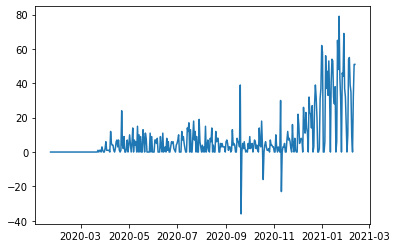

In [254]:
import matplotlib.pyplot as plt
plt.plot(df_la_death.rdate, df_la_death.ncas) 

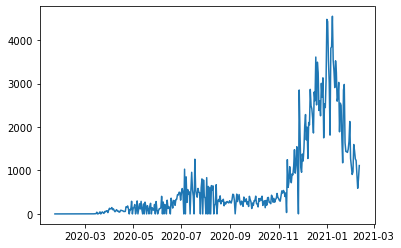

In [255]:
plt.plot(df_la_cases.rdate, df_la_cases.ncas) 

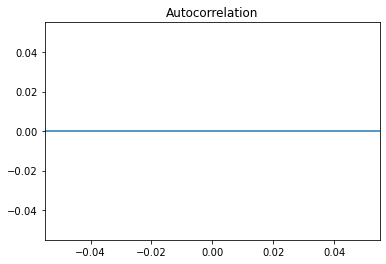

In [256]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df_la_death.ncas, lags=10)
pyplot.show()


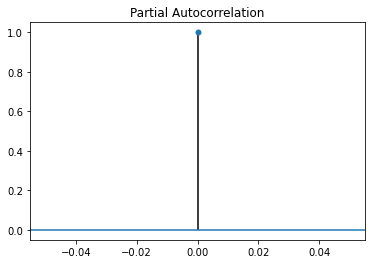

In [257]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(df_la_death.ncas, lags=10)
pyplot.show()

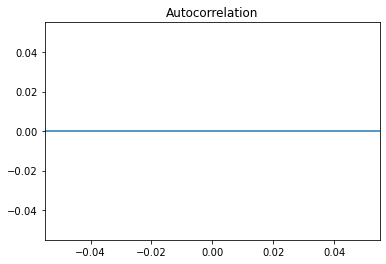

In [258]:
plot_acf(df_la_cases.ncas, lags=10)
pyplot.show()

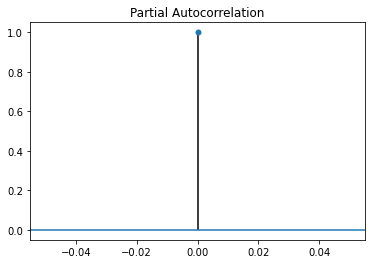

In [259]:
plot_pacf(df_la_cases.ncas, lags=10)
pyplot.show()

In [260]:
for i in range(1, 3+1):
    df_la_death['TMINUS' + str(i)] = df['ncas'].shift(i)

In [261]:
for i in range(1, 3+1):
    df_la_cases['TMINUS' + str(i)] = df['ncas'].shift(i)

In [262]:
df_la_death.head()

,rdate,ncas,admin2,ctype,TMINUS1,TMINUS2,TMINUS3
14634,2020-01-22,NaN,San Diego,D,2243.0,2184.0,2142.0
14635,2020-01-23,0.0,San Diego,D,0.0,2243.0,2184.0
14636,2020-01-24,0.0,San Diego,D,0.0,0.0,2243.0
14637,2020-01-25,0.0,San Diego,D,0.0,0.0,0.0
14638,2020-01-26,0.0,San Diego,D,0.0,0.0,0.0


In [263]:
np.nanmin(df_la_cases.ncas)

0.0

In [264]:
df_la_cases.head()

,rdate,ncas,admin2,ctype,TMINUS1,TMINUS2,TMINUS3
40668,2020-01-22,NaN,San Diego,C,280068.0,279673.0,279412.0
40669,2020-01-23,0.0,San Diego,C,0.0,280068.0,279673.0
40670,2020-01-24,0.0,San Diego,C,0.0,0.0,280068.0
40671,2020-01-25,0.0,San Diego,C,0.0,0.0,0.0
40672,2020-01-26,0.0,San Diego,C,0.0,0.0,0.0


In [265]:
from sklearn.metrics import r2_score
import scipy.stats

In [266]:
varx=df_la_death['ncas'][:-1]
vary=df_la_death['ncas'][1:]

mask = ~np.isnan(varx) & ~np.isnan(vary)
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(varx[mask], vary[mask])

r_value

1.0

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

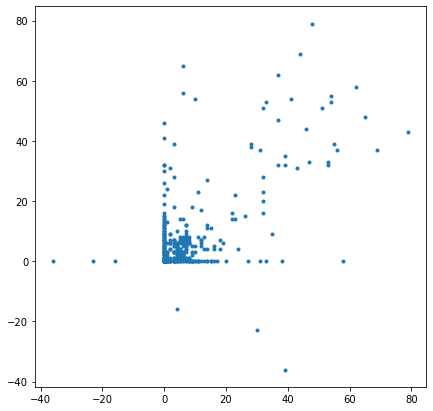

In [241]:
plt.figure(figsize=(7, 7))

plt.scatter(df_la_death['ncas'][:-1], df_la_death['ncas'][1:], marker='.')
# ax.set_title('R2: ' + str(r2_score(df_la_death['ncas'][:-1], df_la_death['ncas'][1:])))

plt.title("Autocorrelation (Lag 1) for the Number of Deaths in San Diego")
plt.xlabel('t')
plt.ylabel('t+1')


In [238]:
np.nanmin(df_la_death['ncas'])

-36.0

Text(0, 0.5, 't+1')

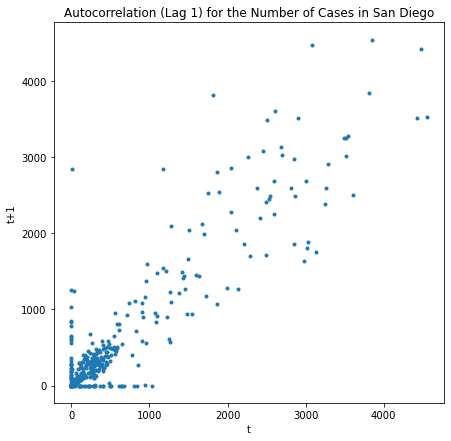

In [235]:
plt.figure(figsize=(7, 7))

plt.scatter(df_la_cases['ncas'][:-1], df_la_cases['ncas'][1:], marker='.')

plt.title("Autocorrelation (Lag 1) for the Number of Cases in San Diego")
plt.xlabel('t')
plt.ylabel('t+1')

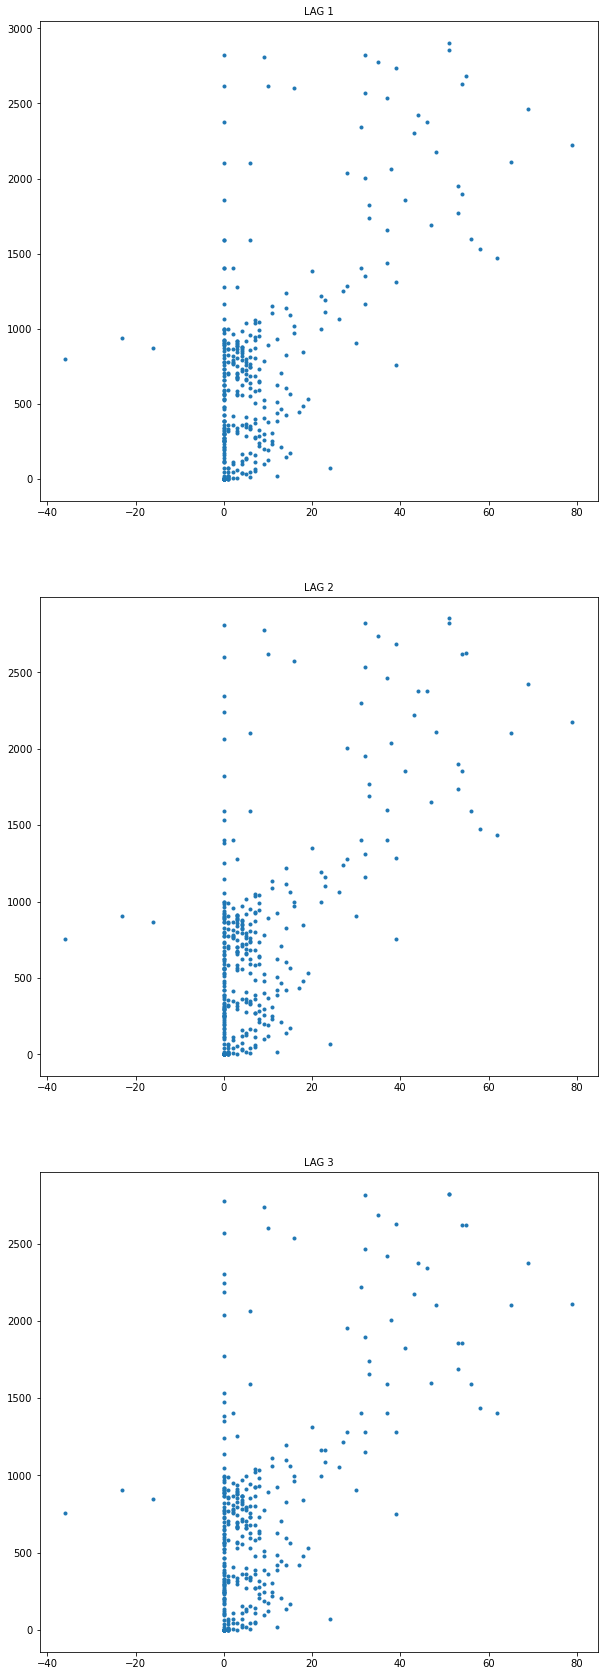

In [204]:
plt.figure(figsize=(10, 30))
for i in range(1, 3+1):
    ax = plt.subplot(3, 1, i)
    ax.set_title('LAG ' + str(i), fontdict={'fontsize': 10})
    plt.scatter(x=df_la_death['ncas'].values, y=df_la_death['TMINUS' + str(i)].values, marker='.')
plt.show()

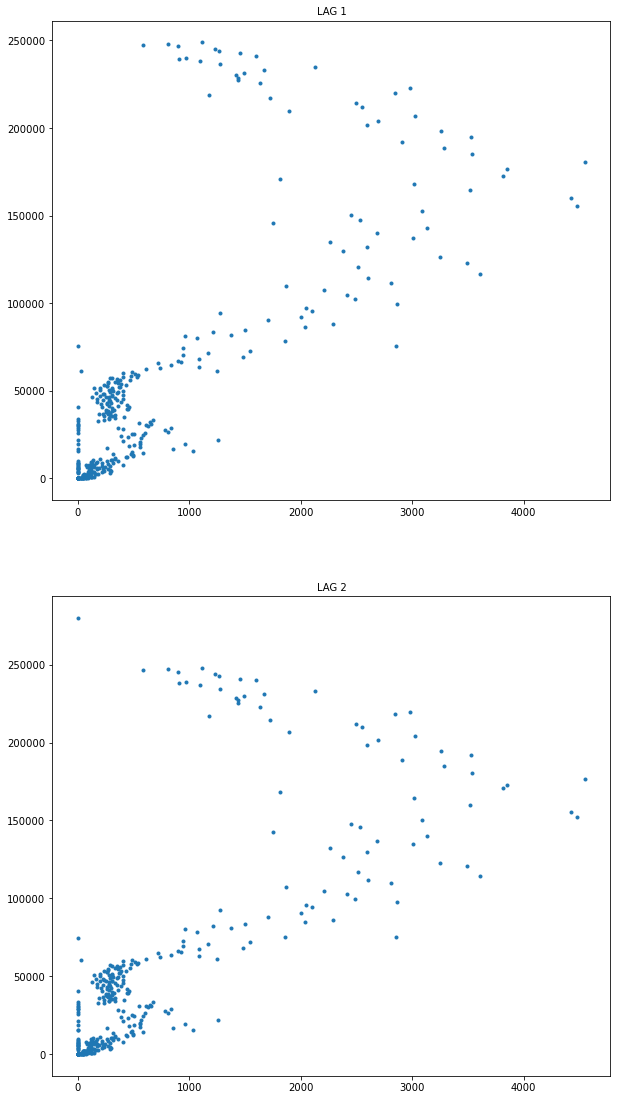

In [205]:
plt.figure(figsize=(10, 30))
for i in range(1, 2+1):
    ax = plt.subplot(3, 1, i)
    ax.set_title('LAG ' + str(i), fontdict={'fontsize': 10})
    plt.scatter(x=df_la_cases['ncas'].values, y=df_la_cases['TMINUS' + str(i)].values, marker='.')
plt.show()